In [1]:
import pandas
import matplotlib.pyplot as plt 
import numpy as np
import datetime 
import seaborn as sns

In [2]:
df_j = pandas.read_csv("DataClean.csv")

# Analyse des données 

## Création d'une Data Frame Chiffre d'affaires

In [3]:
df_CA = df_j[['date','price']]
df_CA

,date,price
0,2021-06-11 21:02:39.382765,19.53
1,2021-07-21 22:41:38.769525,11.99
2,2021-07-25 12:17:34.446678,12.30
3,2021-07-26 17:37:29.438136,18.94
4,2021-07-27 10:30:00.293075,11.99
...,...,...
336811,2022-01-16 23:40:14.387888,15.99
336812,2022-01-19 09:10:14.900805,16.94
336813,2022-01-24 09:39:50.831782,20.99
336814,2022-02-02 08:11:55.764086,4.99


In [4]:
df_CA['date']= pandas.to_datetime(df_CA['date'])
CA = df_CA.groupby(df_CA['date'].dt.strftime('%B %Y'))['price'].sum().reset_index()
CA

<ipython-input-4-f7e49f23b1c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CA['date']= pandas.to_datetime(df_CA['date'])


,date,price
0,April 2021,473286.810359
1,August 2021,479501.962374
2,December 2021,523090.725179
3,February 2022,532981.379568
4,January 2022,523064.627985
5,July 2021,480986.114388
6,June 2021,481410.985179
7,March 2021,479508.802374
8,May 2021,489542.858777
9,November 2021,513108.805971


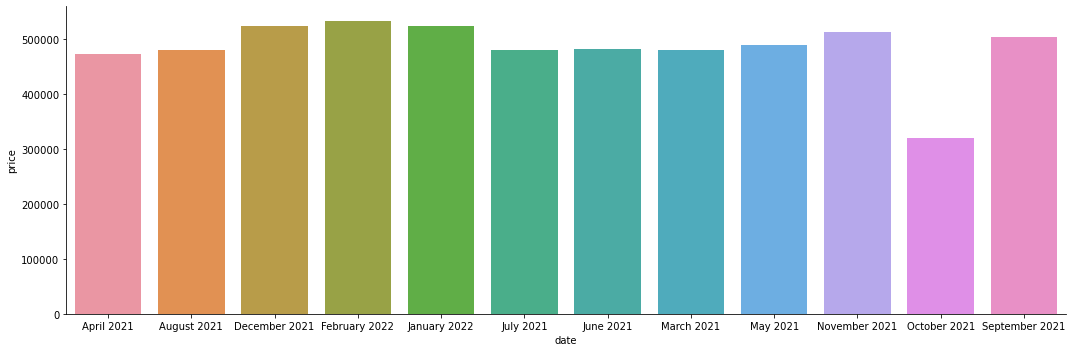

In [5]:
fig = sns.catplot(x= 'date', y= "price", kind="bar", data= CA, height=5, aspect=15/5)
fig.savefig('CA.png')

In [6]:
Otc= df_j[df_j['date'].str.contains('2021-10') == True]
Otc['categ'].value_counts()

0.0    18758
1.0     1666
2.0     1160
Name: categ, dtype: int64

In [7]:
fev= df_j[df_j['date'].str.contains('2022-02') == True]
fev['categ'].value_counts() 

0.0    17273
1.0    10459
2.0     1835
Name: categ, dtype: int64

In [8]:
co= df_j[df_j['categ']== 2]
co

,client_id,sex,birth,id_prod,date,session_id,price,categ,previous_order,days_bw_orders
9,c_1,m,1955.0,2_208,2021-11-04 17:28:13.934070,s_114737,54.87,2.0,2021-10-15 11:28:24.523566,20.0
34,c_10,m,1956.0,2_43,2021-08-27 03:34:47.280771,s_81194,69.99,2.0,2021-08-19 01:04:24.483501,8.0
50,c_100,m,1992.0,2_194,2021-06-24 08:55:49.088700,s_53051,138.53,2.0,2021-06-24 08:51:36.962838,0.0
115,c_1001,m,1982.0,2_2,2021-03-07 14:07:31.004391,s_3041,300.00,2.0,2021-03-07 14:02:12.219679,0.0
478,c_1009,f,1994.0,2_135,2021-05-08 11:58:28.118851,s_31633,68.99,2.0,2021-03-18 00:42:24.481964,51.0
...,...,...,...,...,...,...,...,...,...,...
336777,c_998,m,2001.0,2_140,2021-07-12 23:26:10.238162,s_61485,42.48,2.0,2021-05-26 09:15:46.681210,47.0
336790,c_998,m,2001.0,2_161,2022-01-10 16:41:14.421592,s_147854,113.99,2.0,2021-12-27 03:33:53.552186,14.0
336791,c_998,m,2001.0,2_155,2022-01-10 17:43:42.571229,s_147854,46.99,2.0,2022-01-10 16:41:14.421592,0.0
336792,c_998,m,2001.0,2_0,2022-02-12 22:36:11.694163,s_164207,162.03,2.0,2022-01-10 17:43:42.571229,33.0


In [9]:
cp= df_j[df_j['categ']== 1]
cp

,client_id,sex,birth,id_prod,date,session_id,price,categ,previous_order,days_bw_orders
14,c_1,m,1955.0,1_713,2021-11-15 20:40:00.586010,s_120172,33.99,1.0,2021-11-04 18:37:48.745436,11.0
15,c_1,m,1955.0,1_364,2021-11-15 20:46:25.222740,s_120172,10.30,1.0,2021-11-15 20:40:00.586010,0.0
16,c_1,m,1955.0,1_364,2021-12-15 23:32:41.632729,s_134971,10.30,1.0,2021-11-15 20:46:25.222740,30.0
18,c_1,m,1955.0,1_425,2021-12-25 03:53:43.623598,s_139610,16.99,1.0,2021-12-19 02:44:12.827475,6.0
20,c_10,m,1956.0,1_27,2021-03-21 02:50:16.551727,s_9259,14.99,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
336808,c_999,m,1964.0,1_351,2021-11-21 17:16:06.807620,s_122996,28.99,1.0,2021-11-15 17:53:15.077669,5.0
336809,c_999,m,1964.0,1_727,2021-11-21 17:40:50.856434,s_122996,16.99,1.0,2021-11-21 17:16:06.807620,0.0
336811,c_999,m,1964.0,1_669,2022-01-16 23:40:14.387888,s_150872,15.99,1.0,2021-12-17 03:28:47.129085,30.0
336812,c_999,m,1964.0,1_724,2022-01-19 09:10:14.900805,s_152063,16.94,1.0,2022-01-16 23:40:14.387888,2.0


In [10]:
co.date = pandas.to_datetime(co.date)
df_co = co.groupby(pandas.Grouper(key='date', freq='M')).sum() 
df_co[['price','categ']].sort_values(['price'], ascending=False)  

C:\Users\Nacim\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,price,categ
date,,
2021-08-31,148635.99,3896.0
2021-07-31,147663.47,3956.0
2022-02-28,136479.72,3670.0
2021-05-31,127359.59,3306.0
2021-06-30,124209.56,3338.0
2021-04-30,111682.70,3002.0
2021-11-30,104136.00,2746.0
2022-01-31,102524.72,2740.0
2021-03-31,98771.48,2630.0


In [11]:
cp.date = pandas.to_datetime(cp.date)
df_cp = cp.groupby(pandas.Grouper(key='date', freq='M')).sum() 
df_cp[['price','categ']].sort_values(['price'], ascending=False)  

C:\Users\Nacim\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,price,categ
date,,
2022-01-31,256267.92,12560.0
2021-11-30,252910.39,12316.0
2021-12-31,251026.75,12259.0
2022-02-28,213120.64,10459.0
2021-09-30,190613.78,9268.0
2021-06-30,189162.04,9264.0
2021-07-31,188523.27,9169.0
2021-03-31,186974.17,9134.0
2021-05-31,165893.40,8107.0


## Boîtes à moustaches

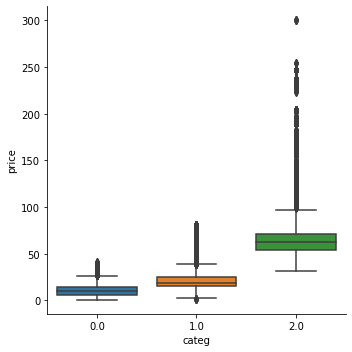

In [12]:
fig= sns.catplot(x="categ", y="price", kind="box", data=df_j)
fig.savefig('Box.png')

## Lorenz et un indice de Gini

In [13]:
shop = df_j.groupby(['client_id', 'birth','sex'], as_index = False).agg({'price': 'sum',
                                                                        'categ': lambda x : x.count()})

shop.rename(columns={'categ': 'panier'}, inplace= True)

shop

,client_id,birth,sex,price,panier
0,c_1,1955.0,m,300.65,20.0
1,c_10,1956.0,m,586.18,28.0
2,c_100,1992.0,m,222.87,6.0
3,c_1000,1966.0,f,980.02,56.0
4,c_1001,1982.0,m,1102.45,58.0
...,...,...,...,...,...
8595,c_995,1955.0,m,119.08,8.0
8596,c_996,1970.0,f,739.60,42.0
8597,c_997,1994.0,f,572.89,23.0
8598,c_998,2001.0,m,1527.69,28.0


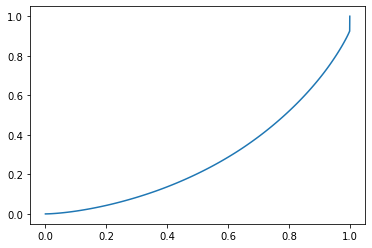

In [14]:
lo = shop[shop['price'] > 0]
dep = lo['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 

xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [15]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini

0.43972595185298724

# Quelques questions supplémentaire

## Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés (Chi-2)

In [16]:
X = "sex"
Y = "categ"

cont = df_j[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,103846,55469,8260,167575
m,105683,54266,9292,169241
Total,209529,109735,17552,336816


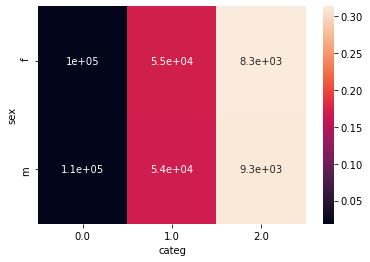

<Figure size 432x288 with 0 Axes>

In [17]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_j)
indep = tx.dot(ty) / n

c = cont.fillna(0) 
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()
plt.savefig('CorrS_Categ.png')

## Y a-t-il une corrélation entre l'âge des clients et le montant total des achats 

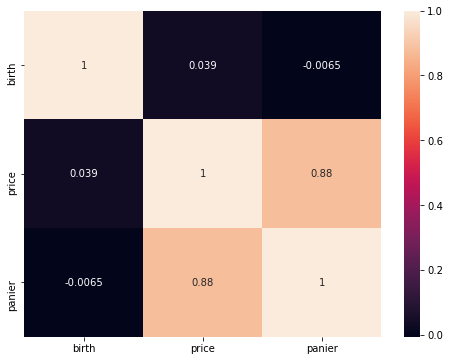

<Figure size 432x288 with 0 Axes>

In [18]:
corr_df = shop.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()
plt.savefig('CorrA_Panier.png')

## Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat

In [19]:
df_j.date = pandas.to_datetime(df_j.date)
df_j = df_j.sort_values(['client_id', 'date'])
df_j['previous_order'] = df_j.groupby(['client_id'])['date'].shift()



df_j['days_bw_orders'] = df_j['date'] - df_j['previous_order']


df_j['days_bw_orders'] = df_j['days_bw_orders'].apply(lambda x: x.days)


df_j.groupby('client_id')['days_bw_orders'].agg('mean')

df_j['days_bw_orders'].mean()
df_j

,client_id,sex,birth,id_prod,date,session_id,price,categ,previous_order,days_bw_orders
0,c_1,m,1955.0,0_1470,2021-06-11 21:02:39.382765,s_47346,19.53,0.0,NaT,NaN
1,c_1,m,1955.0,0_513,2021-07-21 22:41:38.769525,s_65433,11.99,0.0,2021-06-11 21:02:39.382765,40.0
2,c_1,m,1955.0,0_1186,2021-07-25 12:17:34.446678,s_66947,12.30,0.0,2021-07-21 22:41:38.769525,3.0
3,c_1,m,1955.0,0_1448,2021-07-26 17:37:29.438136,s_67467,18.94,0.0,2021-07-25 12:17:34.446678,1.0
4,c_1,m,1955.0,0_1475,2021-07-27 10:30:00.293075,s_67769,11.99,0.0,2021-07-26 17:37:29.438136,0.0
...,...,...,...,...,...,...,...,...,...,...
336811,c_999,m,1964.0,1_669,2022-01-16 23:40:14.387888,s_150872,15.99,1.0,2021-12-17 03:28:47.129085,30.0
336812,c_999,m,1964.0,1_724,2022-01-19 09:10:14.900805,s_152063,16.94,1.0,2022-01-16 23:40:14.387888,2.0
336813,c_999,m,1964.0,1_247,2022-01-24 09:39:50.831782,s_154462,20.99,1.0,2022-01-19 09:10:14.900805,5.0
336814,c_999,m,1964.0,0_1449,2022-02-02 08:11:55.764086,s_158756,4.99,0.0,2022-01-24 09:39:50.831782,8.0


In [20]:
df_jsp = df_j.groupby(['client_id', 'birth'], as_index = False).agg({'days_bw_orders': 'mean'})
df_jsp

,client_id,birth,days_bw_orders
0,c_1,1955.0,12.105263
1,c_10,1956.0,9.592593
2,c_100,1992.0,22.400000
3,c_1000,1966.0,6.036364
4,c_1001,1982.0,6.052632
...,...,...,...
8595,c_995,1955.0,29.714286
8596,c_996,1970.0,7.951220
8597,c_997,1994.0,11.136364
8598,c_998,2001.0,12.407407


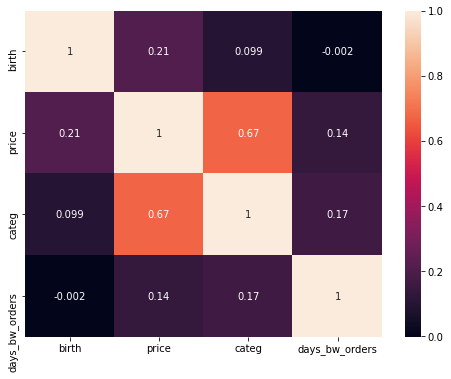

In [21]:
corr_df = df_j.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

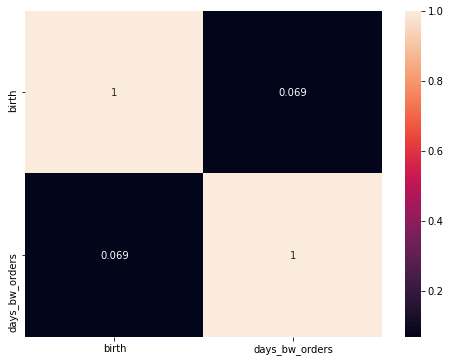

<Figure size 432x288 with 0 Axes>

In [22]:
corr_df = df_jsp.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()
plt.savefig('CorrA_Freq.png')

## Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles)

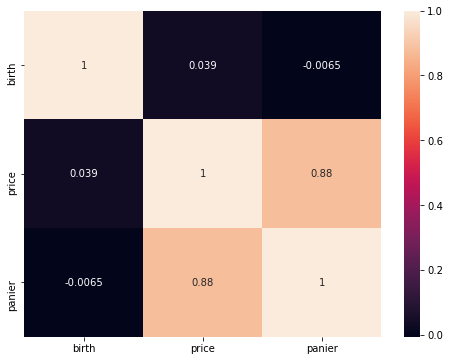

<Figure size 432x288 with 0 Axes>

In [23]:
corr_df = shop.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()
plt.savefig('CorrA_Nshop.png')

## Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés

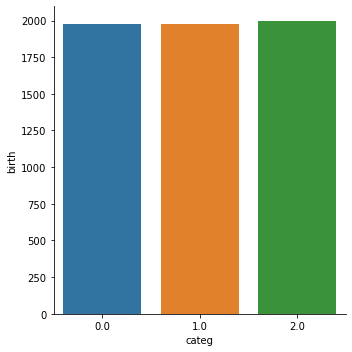

In [24]:
fig= sns.catplot(x= "categ", y= "birth", kind="bar", data= df_j)
fig.savefig('A_Categ.png')

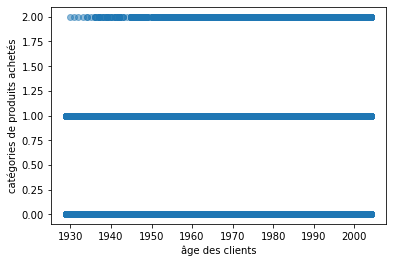

<Figure size 432x288 with 0 Axes>

In [25]:
depenses = df_j
plt.plot(depenses["birth"],depenses["categ"],'o',alpha=0.5)
plt.xlabel("âge des clients")
plt.ylabel("catégories de produits achetés")
plt.show()
plt.savefig('CorrA_Categ.png')

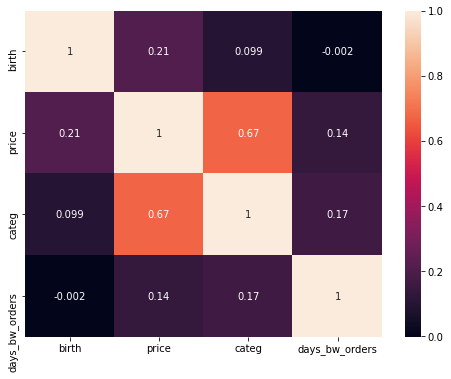

<Figure size 432x288 with 0 Axes>

In [26]:
corr_df = df_j.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()
plt.savefig('CorA_Categ.png')